<a href="https://colab.research.google.com/github/BetsyMenB/Wine-Quality-Analysis/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt

###Import Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


###Red Wine Analysis

###Part 1: Data Adquisicion

In [ ]:
# Part 1: Data Adquisicion
red = pd.read_csv('winequality-red.csv', delimiter=';')
white = pd.read_csv('winequality-white.csv', delimiter=';')

In [ ]:
# Information about red wine
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Description about red wine's data
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Number of observations and number of variables
#Confirming desired portrait shape for probability prediction
#Probability: n= 6xmx(u+1) = 144 observations
red.shape

(1599, 12)

###Part 2: Relevance Detection

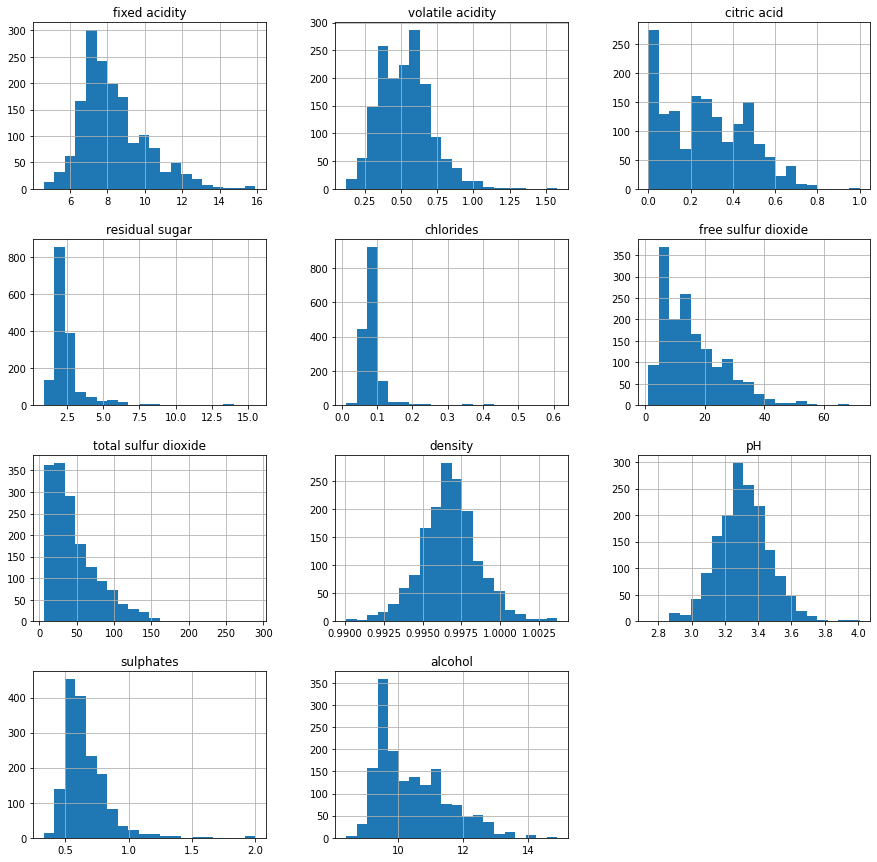

In [ ]:
# Distribution of all Predictors
red[['fixed acidity',	'volatile acidity',	'citric acid',	"residual sugar",	
     'chlorides', 'free sulfur dioxide', 	'total sulfur dioxide',	'density',
     'pH',	'sulphates', 	'alcohol']].hist(bins=20, figsize=(15, 15))

plt.show()


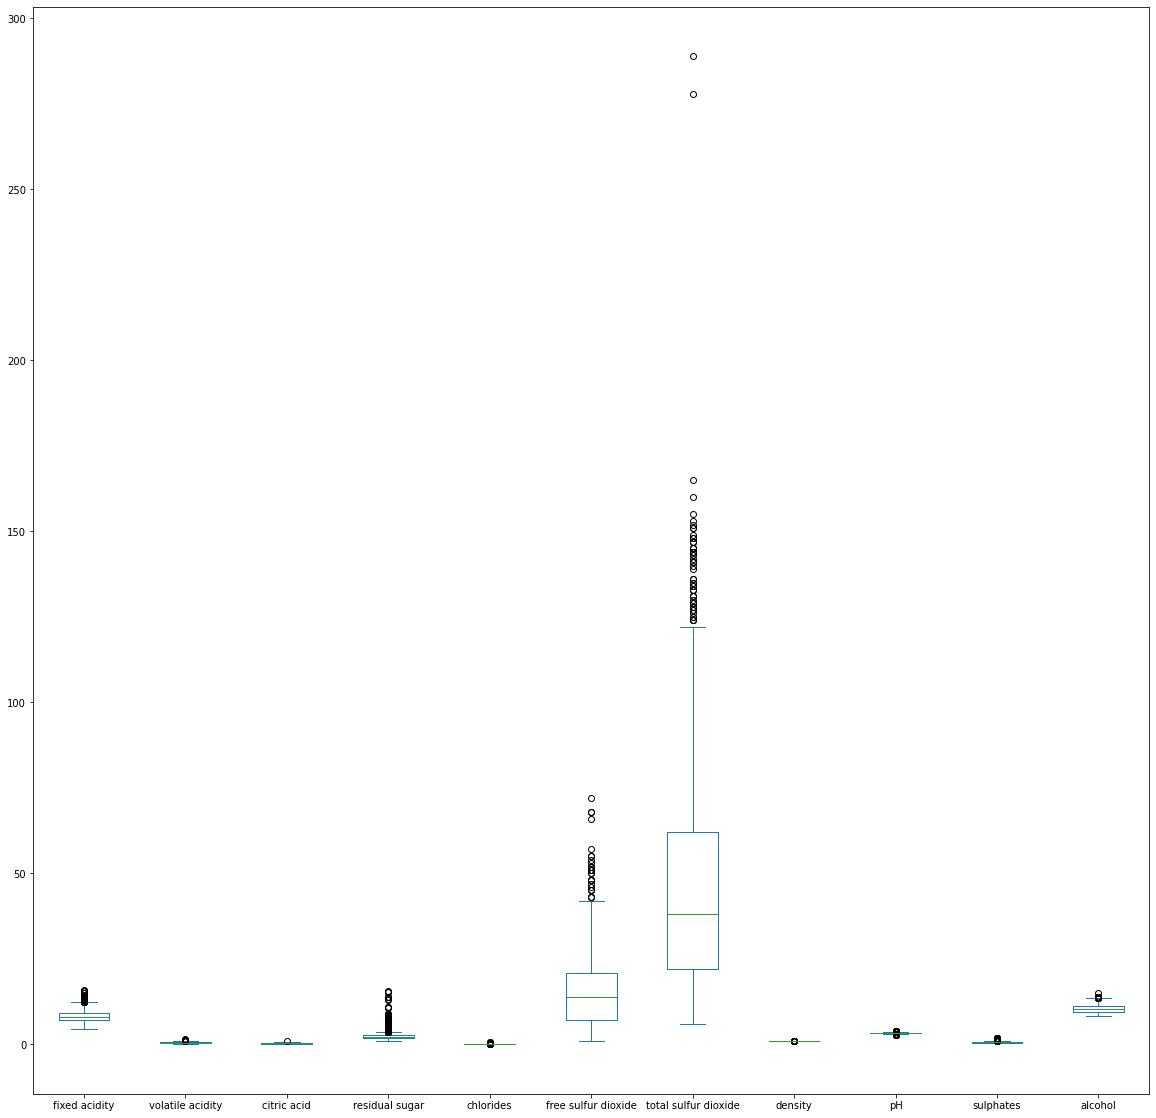

In [ ]:
red[['fixed acidity',	'volatile acidity',	'citric acid',	"residual sugar",	
     'chlorides', 'free sulfur dioxide', 	'total sulfur dioxide',	'density',
     'pH',	'sulphates', 	'alcohol']].plot.box(figsize=(20, 20))

Text(0.5, 1.0, 'alcohol')

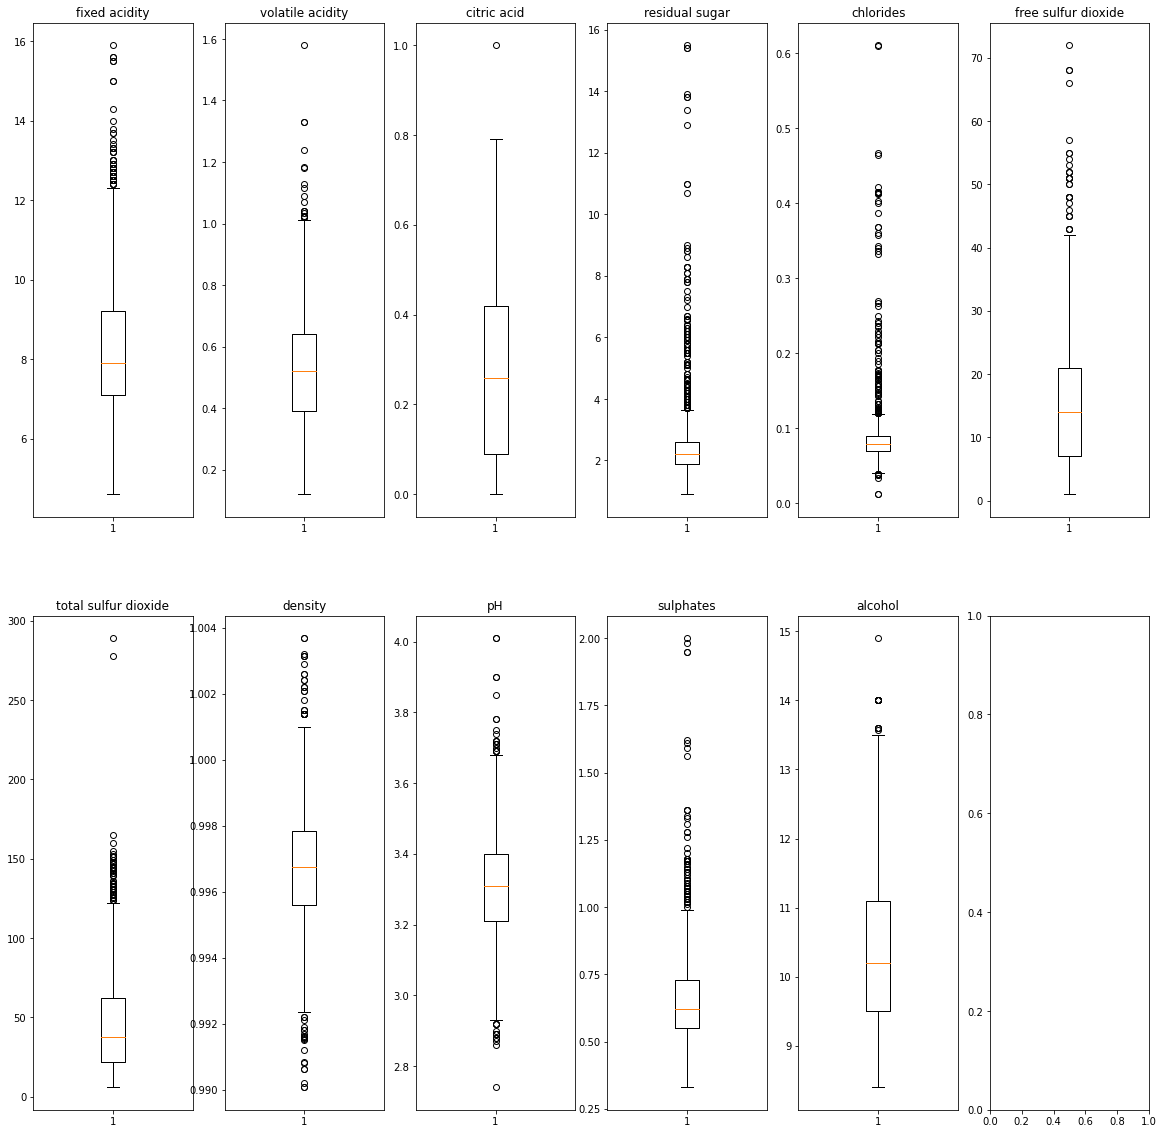

In [ ]:
# Individual Boxplots
fig, axs = plt.subplots(2, 6, figsize=(20,20))

axs[0, 0].boxplot(red['fixed acidity'])
axs[0, 0].set_title('fixed acidity')

axs[0, 1].boxplot(red['volatile acidity'])
axs[0, 1].set_title('volatile acidity')

axs[0, 2].boxplot(red['citric acid'])
axs[0, 2].set_title('citric acid')

axs[0, 3].boxplot(red['residual sugar'])
axs[0, 3].set_title('residual sugar')

axs[0, 4].boxplot(red['chlorides'])
axs[0, 4].set_title('chlorides')

axs[0, 5].boxplot(red['free sulfur dioxide'])
axs[0, 5].set_title('free sulfur dioxide')

axs[1, 0].boxplot(red['total sulfur dioxide'])
axs[1, 0].set_title('total sulfur dioxide')

axs[1, 1].boxplot(red['density'])
axs[1, 1].set_title('density')

axs[1, 2].boxplot(red['pH'])
axs[1, 2].set_title('pH')

axs[1, 3].boxplot(red['sulphates'])
axs[1, 3].set_title('sulphates')

axs[1, 4].boxplot(red['alcohol'])
axs[1, 4].set_title('alcohol')



In [ ]:
# Distribution of Target Data
grouped_wine = red.groupby( by= 'quality').size()
grouped_wine

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

Text(0, 0.5, 'Frequency Count')

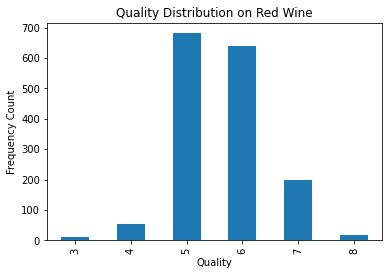

In [ ]:
# Distribution of Target Data
grouped_wine.plot.bar()
      
# giving title to the plot
plt.title("Quality Distribution on Red Wine")
      
# giving X and Y labels
plt.xlabel("Quality")
plt.ylabel("Frequency Count")

In [ ]:
# Correlation
red_corr = red.corr()
red_corr 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


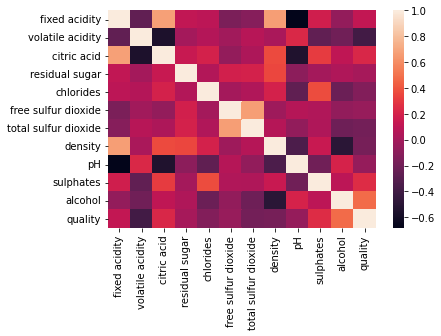

In [ ]:
# Heatmap
sns.heatmap(red_corr, xticklabels=red_corr.columns, yticklabels= red_corr.columns)

In [ ]:
red_corr_quality = red.corr()['quality']
red_corr_quality

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

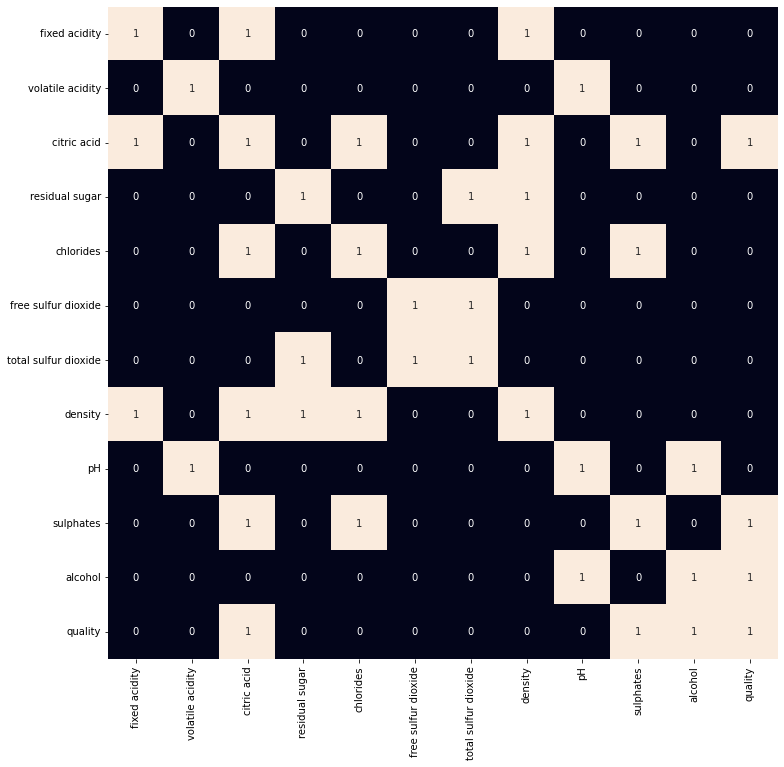

In [ ]:
# We are interested in the features that have a correlation > 0.2
plt.figure(figsize=(12, 12))
sns.heatmap(red_corr  > 0.2, annot=True, cbar=False)
plt.show()


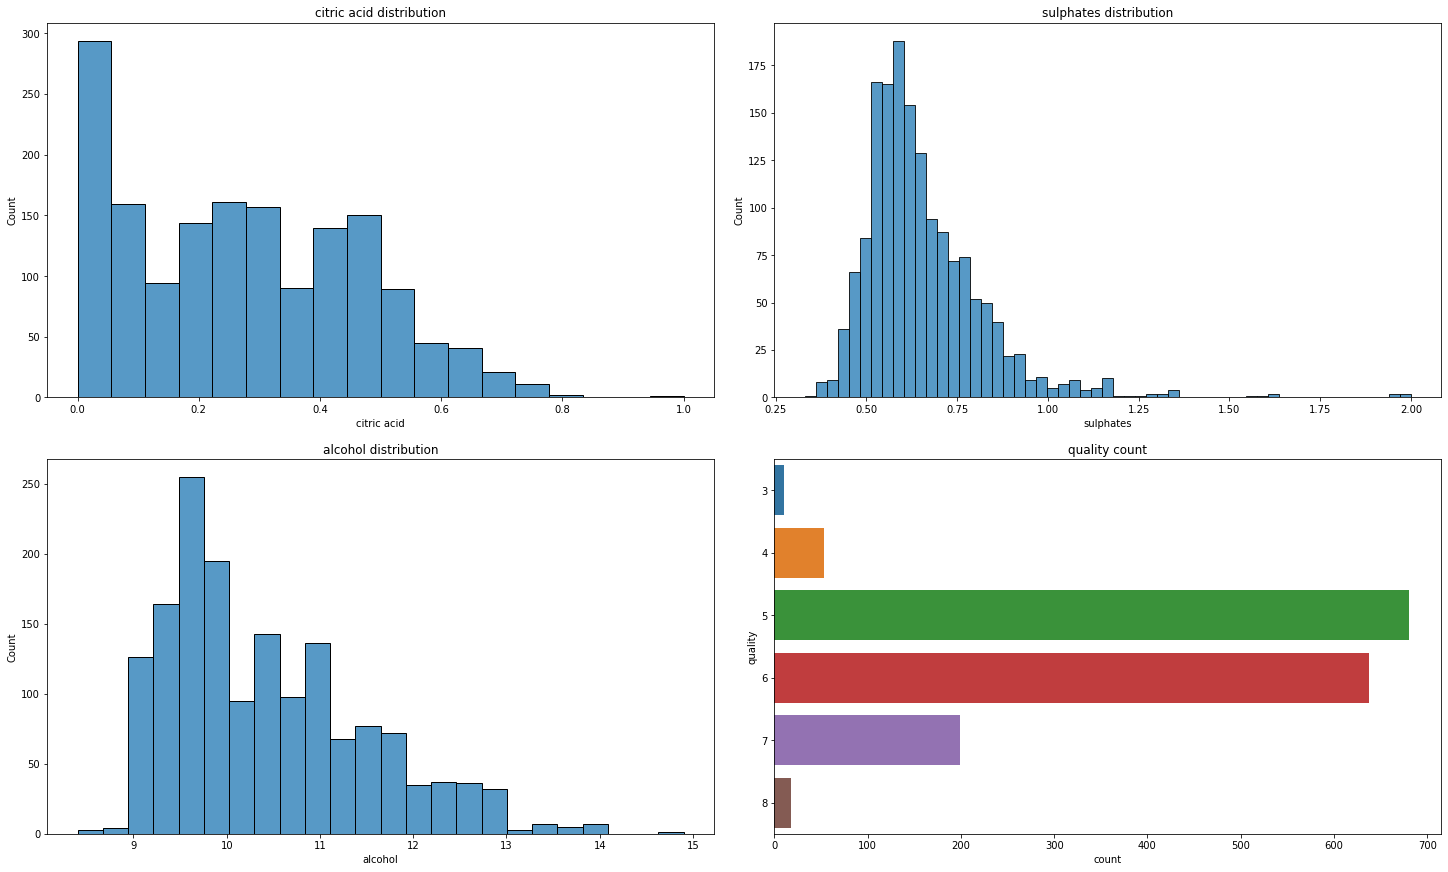

In [ ]:
# Check features > 0.2
def plotting_features(data):
    
    ignored_cols = ["fixed acidity", "volatile acidity" , "residual sugar", "chlorides", "free sulfur dioxide",  "total sulfur dioxide",  "density",  "pH" ]
    cols = [ col for col in data.columns if col not in ignored_cols]
 
    nrows= int(np.ceil(len(cols)/2))
    fig, ax = plt.subplots(
                        nrows=nrows, 
                        ncols=2, 
                        figsize=(20,12),   
                        constrained_layout=True)
    ax = ax.ravel()
 
    for i in range(len(cols)):
        if (len(data[cols[i]].unique().tolist()) < 10): 
            sns.countplot(y = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} count')
 
        else:
            sns.histplot(x = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} distribution');

            
plotting_features(red)

###Part 3: Missing Values

In [ ]:
# No missing values
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###Part 4: Variable Transformation

In [ ]:
red_wine= red.copy()

# we want to make target variable a probability, IF quality > 7, high quality (1), else low quality (0)
red_wine['best quality']= [1 if x > 6 else 0 for x in red_wine.quality]
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
# Remove quality and keep best quality
rvar = ['quality']
red_wine1 =red_wine.drop(columns= rvar)
red_wine1 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [ ]:
# Dividing Numerical and Categorical values
num_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Standardizing all numerical values
red_wine1 [num_vars] = (red_wine1[num_vars] - red_wine1[num_vars].mean()) / red_wine1[num_vars].std()
red_wine1 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,0
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,0
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,0
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,0
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,0
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,0
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,0


In [ ]:
# 18/1581 = 14%
red_wine1['best quality'].value_counts()

0    1382
1     217
Name: best quality, dtype: int64

In [ ]:
# Convert categorical values
red_wine2= red_wine1.copy()
cat_vars= ['best quality']
red_wine2[cat_vars] = red_wine1[cat_vars].astype("category")
red_wine2[num_vars] = red_wine1[num_vars].astype("float64")

# Dummies
red_wine3 = red_wine2.copy()
red_wine3 = pd.get_dummies(red_wine2, prefix_sep ="_")
red_wine3.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'best quality_0', 'best quality_1'], dtype=object)

In [ ]:
# Remove dummies
rdummies= ['best quality_0']
red_wine4 = red_wine3.copy()
red_wine4 = red_wine3.drop(columns= rdummies)
red_wine4.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'best quality_1'], dtype=object)

###Part 5: Data Partition

In [ ]:
dfpartition= red_wine4
testpart_size=0.2

df_nontestData, df_testData = train_test_split(dfpartition, test_size=testpart_size, random_state= 1)
# Non test Data 80%
df_nontestData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality_1
701,-0.757935,0.682339,-1.288368,-0.311225,-0.456101,-0.752849,-0.652609,0.240191,1.029150,0.069915,-0.866108,0
56,1.079988,-0.602148,1.535024,0.610807,-0.371113,-1.135253,-1.108601,0.187206,-1.756068,-0.166063,-0.772270,0
142,-1.791766,-1.048927,-1.391037,-0.524002,-0.796054,1.063567,0.502570,-2.726957,2.389373,0.777851,3.356597,0
863,-0.643065,0.514797,-1.083031,-0.027523,-0.201136,0.107558,1.140959,0.377952,1.288240,-0.756009,-0.678432,0
1387,-0.528194,0.626492,-1.031696,-0.524002,0.266299,-0.752849,-0.713408,-0.342642,-0.071983,-0.461036,-0.772270,0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.643065,-0.211217,-0.467018,0.114328,-0.392360,-0.274845,-0.379014,-0.024733,-0.136755,-1.050982,-1.147622,0
905,0.505637,0.291408,-0.364349,0.327105,-0.137395,-0.083643,2.083342,0.664069,-0.525391,-0.402042,-0.866108,0
1096,-0.987675,1.101194,-0.929027,2.100245,0.627500,-0.657248,-0.895805,-0.104210,0.251880,-0.991988,0.353785,0
235,-0.643065,0.570645,-1.391037,-0.453077,0.202558,-0.179244,-0.257416,0.001760,0.381425,-0.461036,-1.335297,0


In [ ]:
# Test Data 20%
df_testData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality_1
75,0.275897,-0.657996,1.894365,-0.240300,0.117570,-0.657248,-0.135818,0.981978,1.482557,0.010921,0.072271,0
1283,0.218462,0.570645,0.046326,0.114328,0.181311,0.107558,0.684967,0.314370,-0.331073,-0.166063,-0.209243,0
408,1.194858,-1.048927,1.586358,0.823584,1.838583,-0.944051,-0.926204,0.134222,-0.784481,0.246899,0.822974,0
1281,-0.700500,-0.378759,-0.364349,-0.453077,-0.222383,1.159168,0.228975,-0.607566,0.381425,-0.107068,-0.021567,0
1118,-0.700500,-0.769690,-0.775024,-0.311225,-0.477348,-0.179244,-0.683009,-2.239497,-0.071983,-0.756009,2.699732,0
...,...,...,...,...,...,...,...,...,...,...,...,...
890,-0.643065,-1.048927,-0.159011,-0.382151,-0.349866,1.350370,0.168176,-0.522790,0.834832,-0.461036,-0.303081,0
146,-1.447156,0.849881,-1.288368,-0.524002,-0.009913,0.489962,1.444953,-1.243383,1.482557,-0.815004,-0.396918,0
1551,-0.700500,0.794034,-1.391037,-0.169374,-0.094901,0.203159,-0.591810,0.494518,0.834832,-0.697015,-0.959946,0
1209,-1.217415,-0.769690,0.816342,-0.382151,-0.349866,-0.179244,-0.683009,-1.306965,0.899605,1.249808,0.729136,1


###Part 6 (a): Logistic Regression w/ Penalty

In [ ]:
DV= "best quality_1"
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Logistic regression w/Alpha

alpha =80
clf_wine= LogisticRegression(C= 1/alpha, penalty='l1', solver = 'saga', max_iter= 200,  random_state = 1).fit(X,y)

def summary_coef(model_object):
  n_predictors= X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns =X.columns.values)
  model_coef["Intercept"]= model_object.intercept_
  return model_coef.transpose()

summary_coef(clf_wine)

,0
fixed acidity,0.000000
volatile acidity,-0.184217
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
total sulfur dioxide,0.000000
density,0.000000
pH,0.000000
sulphates,0.000000


###Part 6 (b): Logistic Regression w/ Cross Validation

In [ ]:
kfolds = 5

min_alpha = 0.001
max_alpha = 100
n_candidates = 1000

import numpy as np

alpha_list = list(np.linspace(min_alpha, max_alpha, num= n_candidates))
C_list = list(1/np.linspace(min_alpha, max_alpha, num= n_candidates))


# Optimal Coefficient (penalty level)
clf_optimal_wine=LogisticRegressionCV(Cs= C_list, cv =kfolds, penalty="l1", solver="saga", max_iter = 2000, random_state = 1, n_jobs = -1).fit(X,y)

# Optimal Coefficient (penalty level)
print(summary_coef(clf_optimal_wine))

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal_wine.C_)

                             0
fixed acidity         0.361438
volatile acidity     -0.488195
citric acid           0.067604
residual sugar        0.273523
chlorides            -0.478457
free sulfur dioxide   0.218705
total sulfur dioxide -0.652533
density              -0.368686
pH                   -0.085995
sulphates             0.646305
alcohol               0.878911
Intercept            -2.773121
[0.60159459]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


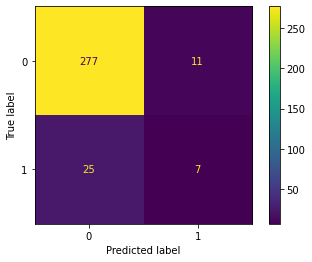

None
The error rate over the selected model is: 0.8875


In [ ]:
# calculate error rate over the selected model
y_test_actual =df_testData[DV] #Dependent variable, actual binaries
X_test = df_testData.drop(columns=[DV]) #Predictors

# How to get predicted binaries
y_test_predicted=clf_optimal_wine.predict(X_test)
y_test_predicted_df = pd.DataFrame(y_test_predicted)

# Compare predicted binaries with actual binaries
from sklearn import metrics
metrics.plot_confusion_matrix(clf_optimal_wine, X_test, y_test_actual)
confusion = plt.show()
print(confusion)

# Calculate error rate
print("The error rate over the selected model is:", clf_optimal_wine.score(X_test, y_test_actual))


In [ ]:
# calculate AUC over the selected model
from sklearn.metrics import roc_auc_score
print("The AUC of the selected model is:", roc_auc_score(y_test_actual, clf_optimal_wine.predict_proba(X_test)[:,1]))

The AUC of the selected model is: 0.8368055555555556


###Part 7: Scoring New Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving New_data_red.csv to New_data_red.csv


In [ ]:
df_red = pd.read_csv("New_data_red.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4.6,0.00,0.12,0.952,0.012,54,10,0.999,0.25,1.0,9
1,5.2,0.32,0.80,13.000,0.369,22,160,0.992,3.40,1.3,12
2,10.0,0.65,0.93,7.562,0.521,33,95,1.002,2.70,1.2,11


In [ ]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
npredictor_list_red = num_vars.copy()
npredictor_list_red

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
# Convert numerical values
df_red_sample1 = df_red.copy()
df_red_sample1[npredictor_list_red]= df_red[npredictor_list_red].astype("float64")
df_red_sample1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4.6,0.00,0.12,0.952,0.012,54.0,10.0,0.999,0.25,1.0,9.0
1,5.2,0.32,0.80,13.000,0.369,22.0,160.0,0.992,3.40,1.3,12.0
2,10.0,0.65,0.93,7.562,0.521,33.0,95.0,1.002,2.70,1.2,11.0


In [ ]:
# Standardization
historical_red_sample_mean=red_wine1[num_vars].mean()
historical_red_sample_std= red_wine1[num_vars].std()

df_red_sample2 = df_red_sample1.copy()
df_red_sample2[npredictor_list_red] =(df_red_sample1[npredictor_list_red] - historical_red_sample_mean[npredictor_list_red])/historical_red_sample_mean[npredictor_list_red]
df_red_sample2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.293976e+16,-1.000000e+00,-1.125196e+15,-8.569494e+15,3.375589e+13,-8.680085e+17,3.750654e+17,-2.879280e+13,8.735995e+13,1.500262e+15,1.265846e+17
1,1.462755e+16,1.895067e+15,-7.501308e+15,-1.170204e+17,1.037994e+15,-3.536331e+17,6.001047e+18,-2.859105e+13,1.188095e+15,1.950340e+15,1.687794e+17
2,2.812991e+16,3.849355e+15,-8.720271e+15,-6.806987e+16,1.465568e+15,-5.304496e+17,3.563121e+18,-2.887927e+13,9.434875e+14,1.800314e+15,1.547145e+17


In [ ]:
# Score the new data using the model carried by the model object clf_optimal 
predicted_quality_red= clf_optimal_wine.predict_proba(df_red_sample2)[:,1]

# Print the predicted probablity for the new data observations
print(predicted_quality_red)

[0. 0. 0.]


###White Wine Analysis

###Part 1: Data Adquisicion

In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
#Number of observations and number of variables
#Confirming desired portrait shape for probability prediction
#Probability: n= 6xmx(u+1) = 144 observations
white.shape

(4898, 12)

### Part 2: Relevance Detection

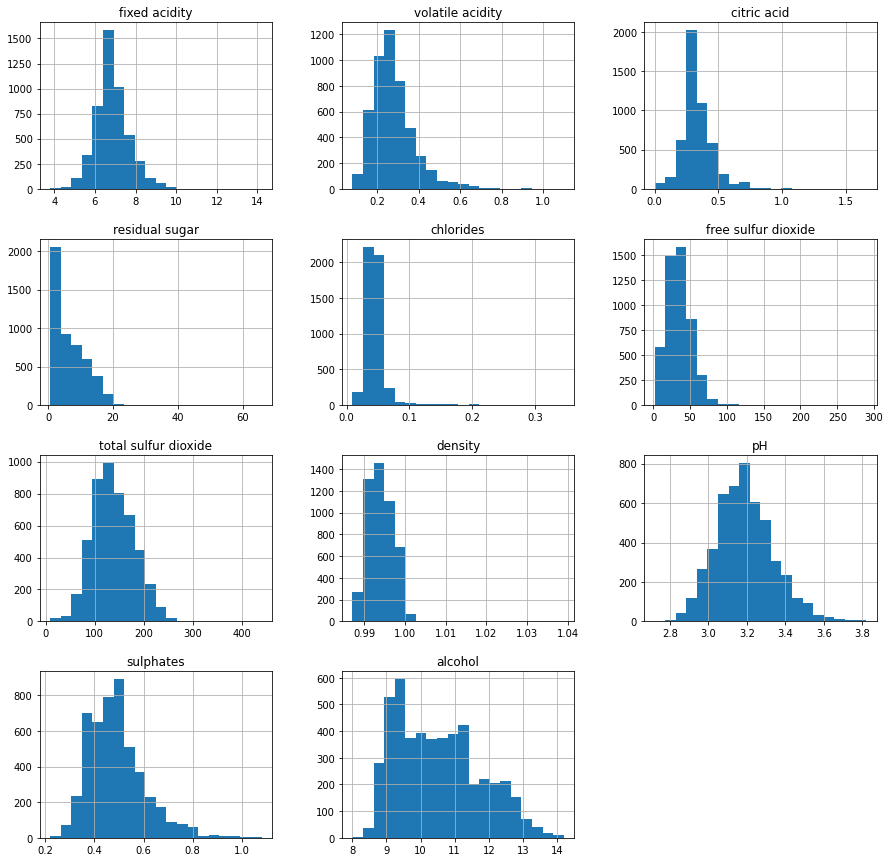

In [ ]:
# Distribution of all Predictors
white[['fixed acidity',	'volatile acidity',	'citric acid',	"residual sugar",	
     'chlorides', 'free sulfur dioxide', 	'total sulfur dioxide',	'density',
     'pH',	'sulphates', 	'alcohol']].hist(bins=20, figsize=(15, 15))

plt.show()

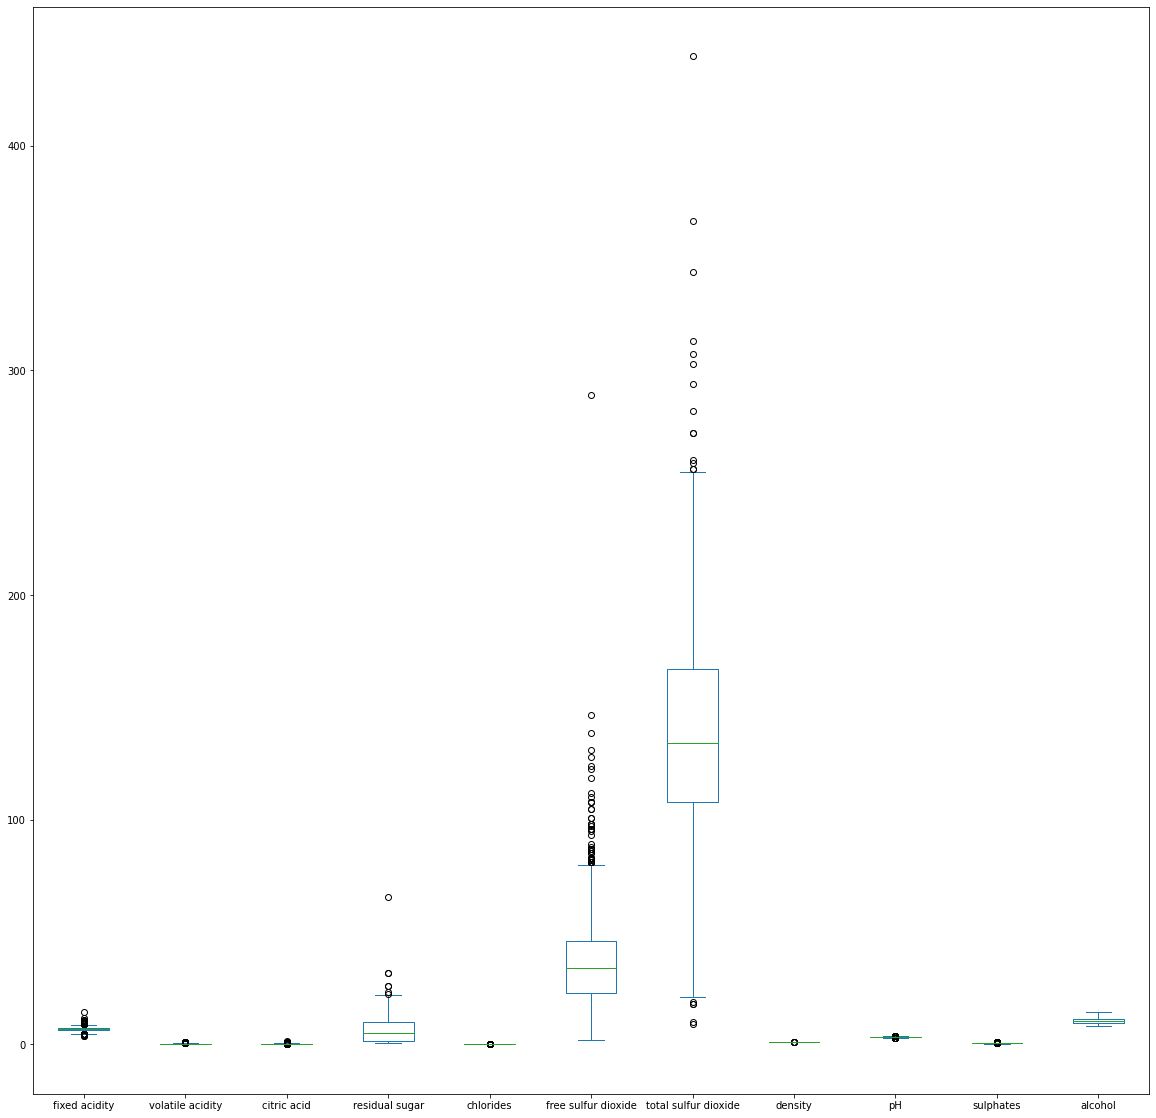

In [ ]:
white[['fixed acidity',	'volatile acidity',	'citric acid',	"residual sugar",	
     'chlorides', 'free sulfur dioxide', 	'total sulfur dioxide',	'density',
     'pH',	'sulphates', 	'alcohol']].plot.box(figsize=(20, 20))

plt.show()

Text(0.5, 1.0, 'alcohol')

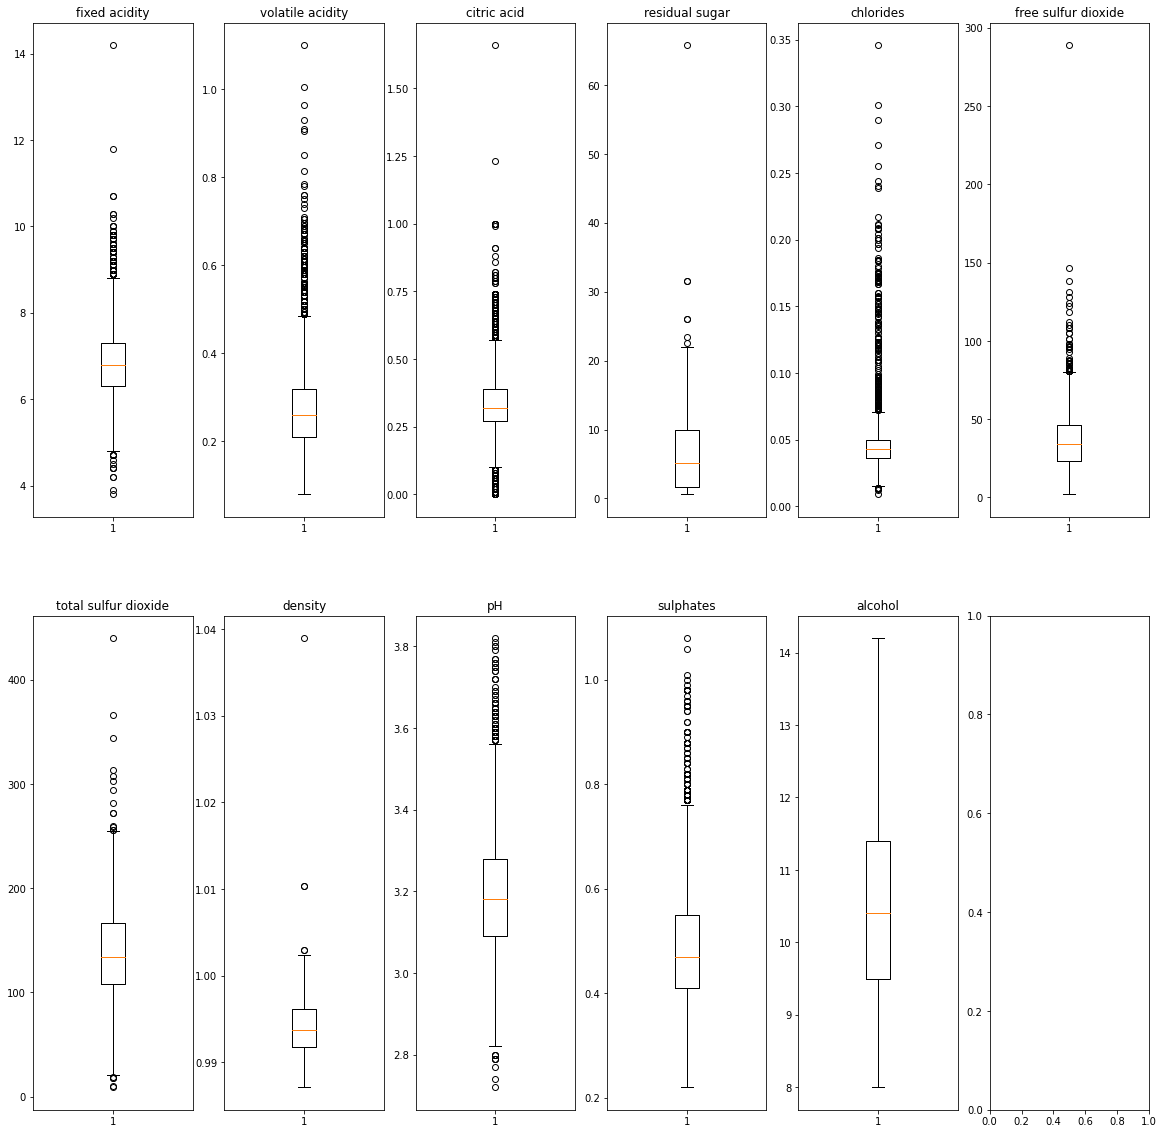

In [ ]:
# Individual Boxplots
fig, axs_wh = plt.subplots(2, 6, figsize=(20,20))

axs_wh[0, 0].boxplot(white['fixed acidity'])
axs_wh[0, 0].set_title('fixed acidity')

axs_wh[0, 1].boxplot(white['volatile acidity'])
axs_wh[0, 1].set_title('volatile acidity')

axs_wh[0, 2].boxplot(white['citric acid'])
axs_wh[0, 2].set_title('citric acid')

axs_wh[0, 3].boxplot(white['residual sugar'])
axs_wh[0, 3].set_title('residual sugar')

axs_wh[0, 4].boxplot(white['chlorides'])
axs_wh[0, 4].set_title('chlorides')

axs_wh[0, 5].boxplot(white['free sulfur dioxide'])
axs_wh[0, 5].set_title('free sulfur dioxide')

axs_wh[1, 0].boxplot(white['total sulfur dioxide'])
axs_wh[1, 0].set_title('total sulfur dioxide')

axs_wh[1, 1].boxplot(white['density'])
axs_wh[1, 1].set_title('density')

axs_wh[1, 2].boxplot(white['pH'])
axs_wh[1, 2].set_title('pH')

axs_wh[1, 3].boxplot(white['sulphates'])
axs_wh[1, 3].set_title('sulphates')

axs_wh[1, 4].boxplot(white['alcohol'])
axs_wh[1, 4].set_title('alcohol')


In [ ]:
# Distribution of Target Data
grouped_white= white.groupby( by= 'quality').size()
grouped_white

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Text(0, 0.5, 'Frequency Count')

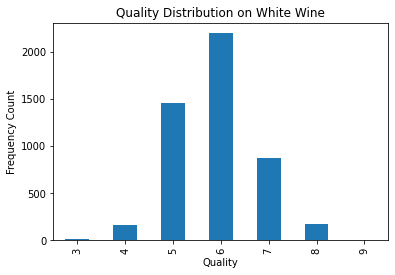

In [ ]:
# Distribution of Target Data
grouped_white.plot.bar()
      
# giving title to the plot
plt.title("Quality Distribution on White Wine")
      
# giving X and Y labels
plt.xlabel("Quality")
plt.ylabel("Frequency Count")

In [ ]:
# Correlation
white_corr = white.corr()
white_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


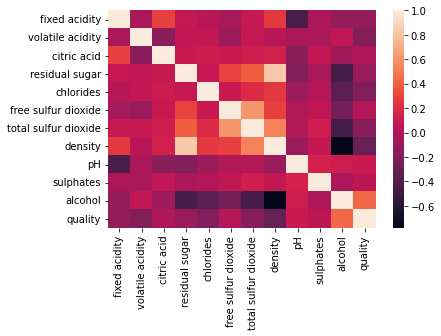

In [ ]:
# Heatmap
sns.heatmap(white_corr, xticklabels=white_corr.columns, yticklabels= white_corr.columns)

In [ ]:
white_corr_quality = white.corr()['quality']
white_corr_quality

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

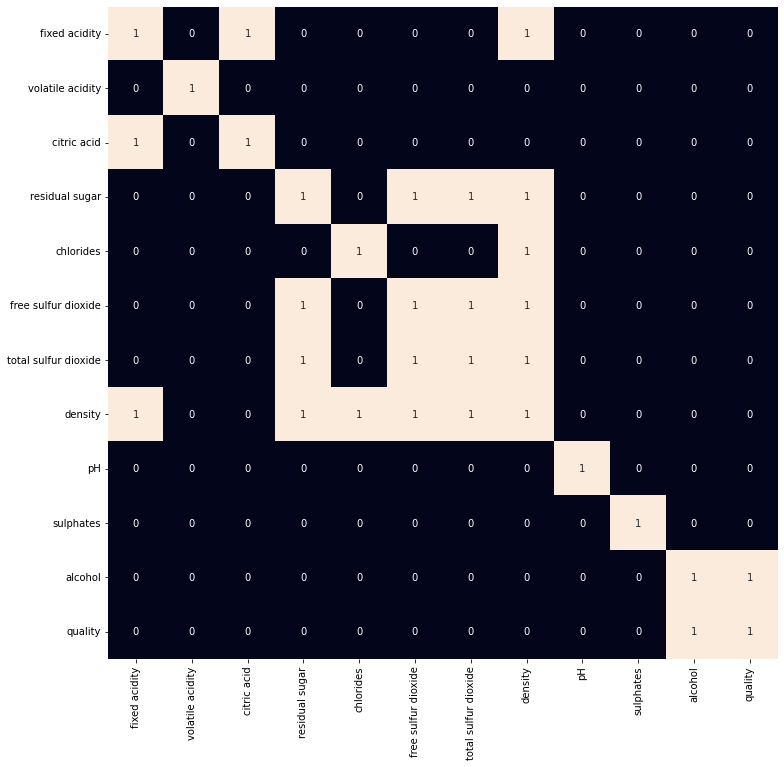

In [ ]:
# We are interested in the features that have a correlation > 0.2
plt.figure(figsize=(12, 12))
sns.heatmap(white_corr  > 0.2, annot=True, cbar=False)
plt.show()


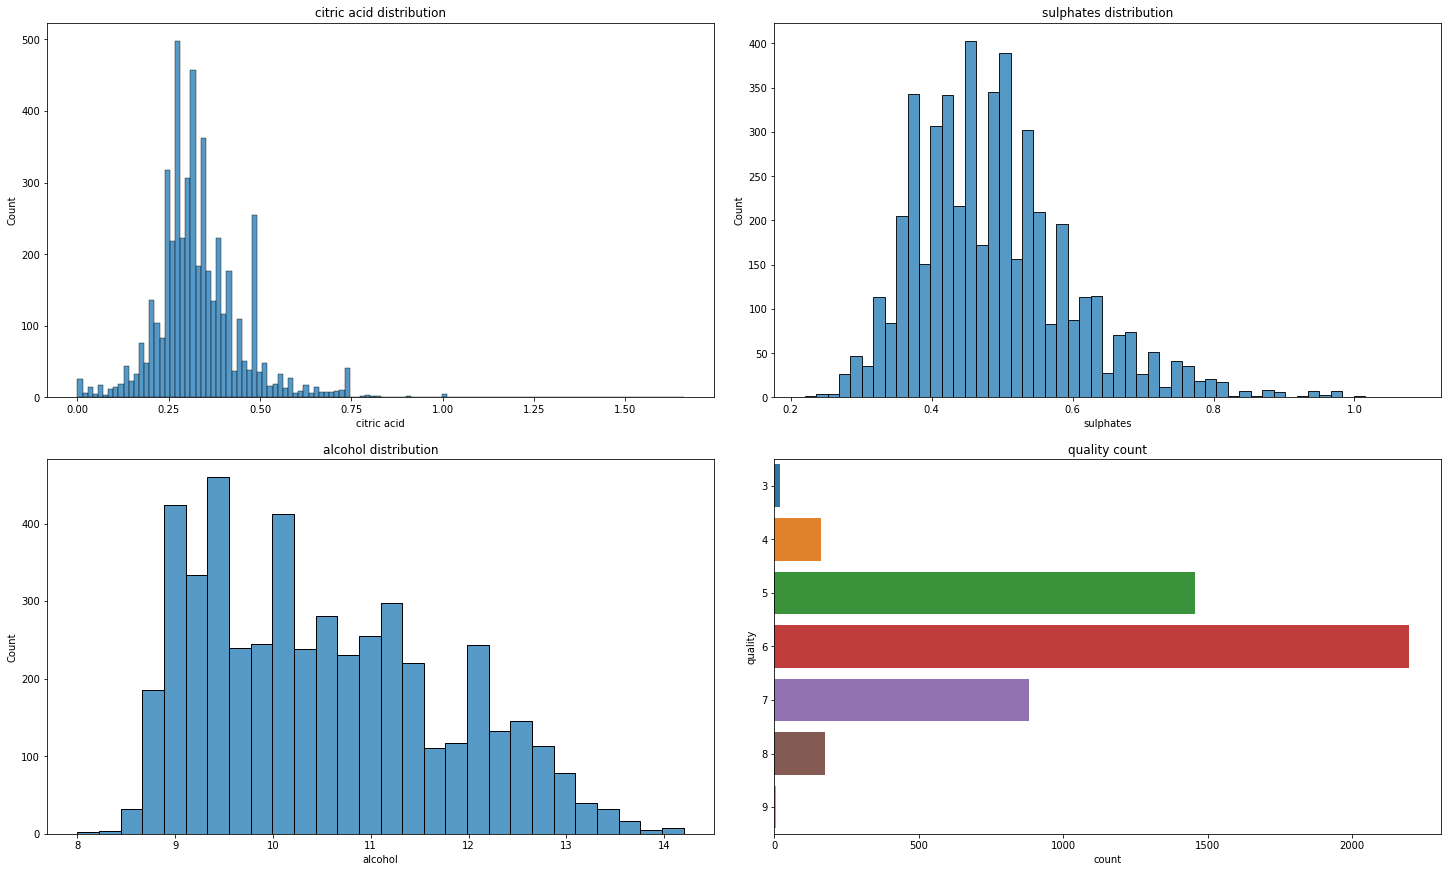

In [ ]:
# Check features > 0.2
def plotting_features(data):
    
    ignored_cols = ["fixed acidity", "volatile acidity" , "residual sugar", "chlorides", "free sulfur dioxide",  "total sulfur dioxide",  "density",  "pH" ]
    cols = [ col for col in data.columns if col not in ignored_cols]
 
    nrows= int(np.ceil(len(cols)/2))
    fig, ax = plt.subplots(
                        nrows=nrows, 
                        ncols=2, 
                        figsize=(20,12),   
                        constrained_layout=True)
    ax = ax.ravel()
 
    for i in range(len(cols)):
        if (len(data[cols[i]].unique().tolist()) < 10): 
            sns.countplot(y = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} count')
 
        else:
            sns.histplot(x = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} distribution');

            
plotting_features(white)

###Part 3: Missing Value Imputation

In [ ]:
# No missing values
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###Part 4: Variable Transformation

In [ ]:
white_wine= white.copy()

# we want to make target variable a probability, IF quality > 7, high quality (1), else low quality (0)
white_wine['best quality white']= [1 if x > 6 else 0 for x in white_wine.quality]
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
# 180/4718 = 3.8% high quality
white_wine["best quality white"].value_counts()

0    3838
1    1060
Name: best quality white, dtype: int64

In [ ]:
# Remove quality and keep best quality
rvar = ['quality']
white_wine1 =white_wine.drop(columns= rvar)
white_wine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [ ]:
# Dividing Numerical and Categorical values
nvars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Standardizing all numerical values
white_wine1[nvars] = (white_wine1[nvars] - white_wine1[nvars].mean()) / white_wine1[nvars].std()
white_wine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality white
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.775936,-0.677032,-0.365159,-0.944669,-0.309976,-0.664902,-1.090889,-0.965385,0.541278,0.088964,0.557225,0
4894,-0.301928,0.414297,0.213258,0.317146,0.056190,1.275460,0.697428,0.291759,-0.253420,-0.261526,-0.742932,0
4895,-0.420430,-0.379397,-1.191470,-1.023532,-0.218435,-0.312109,-0.643809,-0.497299,-1.313019,-0.261526,-0.905451,0
4896,-1.605449,0.116662,-0.282528,-1.043248,-1.088081,-0.900098,-0.667340,-1.784534,1.004853,-0.962507,1.857382,1


In [ ]:
white_wine1[nvars].mean()

fixed acidity          -3.481630e-16
volatile acidity        4.468092e-16
citric acid             2.321087e-17
residual sugar         -1.109770e-16
chlorides               3.075440e-16
free sulfur dioxide    -1.378145e-17
total sulfur dioxide   -4.642174e-17
density                 3.244880e-14
pH                     -1.195360e-15
sulphates              -8.218098e-16
alcohol                -3.713739e-16
dtype: float64

In [ ]:
# Convert categorical values
white_wine2= white_wine1.copy()
cvars= ['best quality white']
white_wine2[cvars] = white_wine1[cvars].astype("category")
white_wine2[nvars] = white_wine1[nvars].astype("float64")

# Dummies
white_wine3 = white_wine2.copy()
white_wine3 = pd.get_dummies(white_wine2, prefix_sep ="_")
white_wine3.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'best quality white_0', 'best quality white_1'], dtype=object)

In [ ]:
# Remove dummies
rdummies_white= ['best quality white_0']
white_wine4 = white_wine3.copy()
white_wine4 = white_wine3.drop(columns= rdummies_white)
white_wine4.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'best quality white_1'], dtype=object)

###Part 5: Data Partition

In [ ]:
dfpartition_wh= white_wine4
testpart_size=0.2

df_wh_nontestData, df_wh_testData = train_test_split(dfpartition_wh, test_size=testpart_size, random_state= 1)
# Non test Data 80%
df_wh_nontestData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality white_1
3749,-0.657434,0.017450,-0.365159,0.080556,0.239274,0.275879,0.109166,-0.096083,1.600877,0.877568,0.394706,0
1344,0.527585,-0.478608,0.295890,-0.885521,-0.218435,0.922666,0.626837,-1.079063,0.475053,-0.787262,1.369823,1
58,-0.301928,1.009567,-1.521995,-0.353193,-0.081122,-0.606103,-1.420315,-0.310065,-0.518320,-0.962507,-0.255373,0
3177,-1.486947,1.307202,-0.943577,0.139704,0.193503,0.511075,0.368001,-0.310065,0.739953,-0.787262,-0.011593,0
3942,0.409083,-0.478608,0.461152,-0.964385,0.330815,-0.547305,-0.761462,-0.791525,-0.054746,-0.173903,0.475966,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.538932,1.604838,-0.613053,-0.865805,0.376586,-0.900098,0.979794,0.392063,2.594250,0.702322,-0.417892,0
2763,1.001593,0.215874,0.047996,-1.023532,0.101961,-1.840879,-0.455566,-1.065689,-0.054746,-1.312997,1.288564,0
905,1.831106,-0.875455,0.709045,-0.944669,0.056190,-1.546885,-0.879114,-0.009153,-0.849445,1.403303,0.475966,0
3980,-0.894438,-0.577820,-0.695684,1.125497,-0.493060,1.099063,-0.079078,0.261668,0.143929,-0.787262,0.150926,0


In [ ]:
# Test Data 20%
df_wh_testData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality white_1
2414,-0.775936,1.009567,-1.274101,0.198851,2.253191,-0.429707,1.332751,1.237960,2.263126,1.929038,-1.067971,0
1584,-0.538932,-0.280185,3.353240,0.277715,-0.035351,0.981465,1.662178,0.525802,0.143929,-0.612016,-1.067971,0
3248,-0.538932,-0.280185,0.295890,-0.372909,-0.309976,0.334678,0.203288,-0.644412,-0.054746,-0.787262,0.475966,1
645,-0.657434,-0.180973,-0.695684,0.277715,0.559670,0.511075,0.650367,0.692975,0.342604,-0.699639,-1.230491,0
3163,0.290581,0.811144,0.295890,-0.313761,-1.225393,0.217080,-0.573218,-1.226175,-0.716995,0.001342,1.776123,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1854,-0.064924,-0.379397,0.130627,0.001693,0.101961,0.511075,0.791550,0.124585,0.673728,0.527077,-0.011593,1
4326,0.646087,1.009567,0.047996,0.376294,0.285045,0.511075,0.697428,0.749814,-0.518320,0.264209,-1.067971,0
2661,0.409083,0.215874,-0.613053,-0.964385,-0.218435,0.628672,0.932733,-0.831646,0.011479,0.614700,0.638485,0
769,-0.183426,-1.669149,0.047996,0.474873,-0.126893,0.334678,-0.596749,0.726410,1.534652,-0.787262,-0.986711,1


###Part 6 (a): Logistic Regression w/ Penalty

In [ ]:
DV= "best quality white_1"
y = df_wh_nontestData[DV]
X = df_wh_nontestData.drop(columns=[DV])

# Logistic regression w/Alpha

alpha = 140

clf_white= LogisticRegression(C= 1/alpha, penalty='l1', solver = 'saga', max_iter= 200,  random_state = 1).fit(X,y)

def summary_coef(model_object):
  n_predictors= X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns =X.columns.values)
  model_coef["Intercept"]= model_object.intercept_
  return model_coef.transpose()

summary_coef(clf_white)

,0
fixed acidity,0.000000
volatile acidity,-0.026644
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
total sulfur dioxide,0.000000
density,0.000000
pH,0.000000
sulphates,0.000000


###Part 6 (b): Logistic Regression w/ Cross Validation

In [ ]:
kfolds = 5

min_alpha = 0.001
max_alpha = 100
n_candidates = 1000

import numpy as np

alpha_list = list(np.linspace(min_alpha, max_alpha, num= n_candidates))
C_list = list(1/np.linspace(min_alpha, max_alpha, num= n_candidates))


# Optimal Coefficient (penalty level)
clf_optimal_white=LogisticRegressionCV(Cs= C_list, cv =kfolds, penalty="l1", solver="saga", max_iter = 2000, random_state = 1, n_jobs = -1).fit(X,y)

# Optimal Coefficient (penalty level)
print(summary_coef(clf_optimal_white))

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal_white.C_)

                             0
fixed acidity         0.256305
volatile acidity     -0.365616
citric acid          -0.072926
residual sugar        0.964964
chlorides            -0.346695
free sulfur dioxide   0.145756
total sulfur dioxide -0.010405
density              -1.127966
pH                    0.336615
sulphates             0.173036
alcohol               0.520511
Intercept            -1.669024
[6.30724324]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


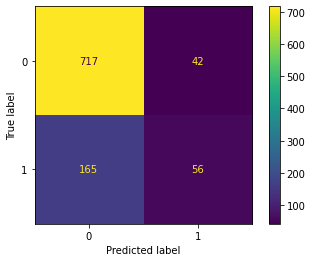

None
The error rate over the selected model is: 0.7887755102040817


In [ ]:
# calculate error rate over the selected model
y_test_actual_wh =df_wh_testData[DV] #Dependent variable, actual binaries
X_test_wh = df_wh_testData.drop(columns=[DV]) #Predictors

# How to get predicted binaries
y_test_predicted_wh=clf_optimal_white.predict(X_test_wh)
y_test_predicted_df_wh= pd.DataFrame(y_test_predicted_wh)

# Compare predicted binaries with actual binaries
from sklearn import metrics
metrics.plot_confusion_matrix(clf_optimal_white, X_test_wh, y_test_actual_wh)
confusion_white = plt.show()
print(confusion_white)

# Calculate error rate
print("The error rate over the selected model is:", clf_optimal_white.score(X_test_wh, y_test_actual_wh))


In [ ]:
# calculate AUC over the selected model
from sklearn.metrics import roc_auc_score
print("The AUC of the selected model is:", roc_auc_score(y_test_actual_wh, clf_optimal_white.predict_proba(X_test_wh)[:,1]))

The AUC of the selected model is: 0.8007380513774376


###Part 7: Scoring New Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving New_data_white.csv to New_data_white.csv


In [ ]:
df_white = pd.read_csv("New_data_white.csv")
df_white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,12.6,0.090,0.25,0.80,0.2650,2,10,0.999,2.85,0.25,9
1,4.0,0.088,0.49,5.08,0.0096,60,15,0.988,3.65,0.50,11
2,6.2,0.093,0.77,41.30,0.1230,190,30,1.010,3.15,1.00,13


In [ ]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
npredictor_list = nvars.copy()
npredictor_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
# Convert numerical values
df_white_sample1 = df_white.copy()
df_white_sample1[npredictor_list]= df_white[npredictor_list].astype("float64")
df_white_sample1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,12.6,0.090,0.25,0.80,0.2650,2.0,10.0,0.999,2.85,0.25,9.0
1,4.0,0.088,0.49,5.08,0.0096,60.0,15.0,0.988,3.65,0.50,11.0
2,6.2,0.093,0.77,41.30,0.1230,190.0,30.0,1.010,3.15,1.00,13.0


In [ ]:
# Standardization
historical_white_sample_mean=white_wine1[nvars].mean()
historical_white_sample_std= white_wine1[nvars].std()

df_white_sample2 = df_white_sample1.copy()
df_white_sample2[npredictor_list] =(df_white_sample1[npredictor_list] - historical_white_sample_mean[npredictor_list])/historical_white_sample_std[npredictor_list]
df_white_sample2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,12.6,0.090,0.25,0.80,0.2650,2.0,10.0,0.999,2.85,0.25,9.0
1,4.0,0.088,0.49,5.08,0.0096,60.0,15.0,0.988,3.65,0.50,11.0
2,6.2,0.093,0.77,41.30,0.1230,190.0,30.0,1.010,3.15,1.00,13.0


In [ ]:
# Score the new data using the model carried by the model object clf_optimal 
predicted_quality = clf_optimal_white.predict_proba(df_white_sample2)[:,1]

# Print the predicted probablity for the new data observations
print(predicted_quality)

[0.99902996 0.99999999 1.        ]
